# Question: What run times solicit the most ratings on IMDb?
We would like to know what run times yield the most imdb ratings. Here we think of the number of IMDb votes as proxy for popularity. 

## Loading data
Below we import our database and print the column names for the `ratings` and `runtimes` tables. We will join these tables to form our data set. 

In [1]:
from moviesdb import moviesdb as mdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
db = mdb.MoviesDb()

In [3]:
print('=== runtimes ===')
for column in db.list_column_names('runtimes'):
    print(column)

print('')
print('=== ratings ===')
for column in db.list_column_names('ratings'):
    print(column)

=== runtimes ===
tconst
runtime_minutes

=== ratings ===
tconst
averagerating
numvotes


We can join the `runtimes` and `ratings` tables on the `tconst` variable. this will produce a dataset with all films for which we have both rating and runtime data. 

In [24]:
query = """
SELECT ru.runtime_minutes, sum(ra.numvotes) AS numvotes
FROM runtimes as ru
INNER JOIN ratings AS ra
USING('tconst')
GROUP BY ru.runtime_minutes
"""
df = db.load_query_as_df(query)

## Question specific data cleaning
There are a few films with extremely long run times, we focus our analysis on films with run times shorter than four hours.   

In [25]:
df = df.query('runtime_minutes <= 240')

Since we have aggregated votes by runtime minute-by-minute we expect the number of votes to be somewhat noisy. To correct for this, we take a rolling average of the number of votes with a window size of ten minutes this provides a smoother estimate of the distribution of number of votes with respect to runtime. 

In [31]:
df_smoothed = df.rolling(on= 'runtime_minutes', window=10).sum()

## Data Visualization
Below we plot the distribution of number of votes with respect to runtime.

<Figure size 576x396 with 0 Axes>

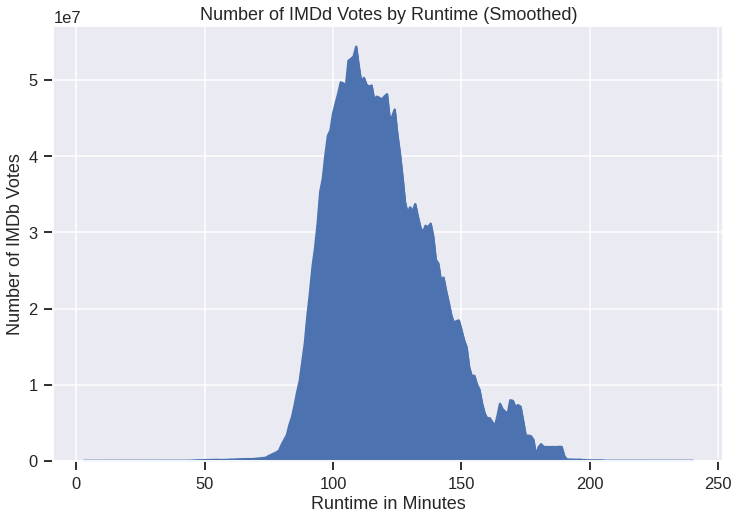

In [69]:
plt.figure()
plt.style.use('seaborn')
sns.set_context('talk')
df_smoothed.plot.area(x='runtime_minutes', 
                      y='numvotes', 
                      figsize=(12,8),
                      xlabel = 'Runtime in Minutes', 
                      ylabel = 'Number of IMDb Votes', 
                      title = 'Number of IMDd Votes by Runtime (Smoothed)',
                      legend = None,
                
                     )
plt.savefig('../images/votes_by_runtime.png', bbox_inches='tight')

## Conclusion
We see that the number of IMDb votes is maximized near a runtime of 109 minutes. This indicates that movies that have run times just shy of two hours are likely to reach the largest audience.

In [71]:
argmax = df_smoothed.loc[df_smoothed['numvotes'].idxmax(),'runtime_minutes']
print(f'Number of IMDb Votes is maximized at a runtime of {argmax} minutes.')

Number of IMDb Votes is maximized at a runtime of 109 minutes.
